# Sentiment Analysis

**Definition:**
Sentiment Analysis (SA) is the process of **determining the sentiment or emotional tone** behind a piece of text.

* Common labels: **Positive, Negative, Neutral**
* Advanced: **Multi-class** (very positive, positive, neutral, negative, very negative)
* Applications: Product reviews, social media monitoring, customer feedback, opinion mining.

---

## Key Concepts in Sentiment Analysis

### **a) Text Preprocessing**

Just like in general NLP, preprocessing is critical:

1. **Tokenization** – Split sentences into words.
2. **Lowercasing** – `"Happy"` → `"happy"`
3. **Stopword Removal** – Remove non-informative words like `"the", "is"`.
4. **Stemming/Lemmatization** – Reduce words to root form (`"loved" → "love"`).
5. **Noise Removal** – Remove URLs, emojis, special characters, HTML tags.

---

### **b) Feature Representation**

Convert text to numeric features that a model can understand:

1. **Bag of Words (BoW)** – Count word occurrences.
2. **TF-IDF** – Weight words by importance.
3. **Word Embeddings** – Word2Vec, GloVe (dense vectors capturing meaning).
4. **Sentence/Document Embeddings** – AvgWord2Vec, BERT embeddings for context.

**Intuition:** The features should capture the words/phrases that express sentiment (`"love"`, `"hate"`, `"amazing"`, `"terrible"`).

---

### **c) Lexicon-based vs ML-based Approaches**

1. **Lexicon-based Approach:**

   * Uses predefined **lists of words** with positive/negative scores.
   * Example: `"good"=+1, "bad"=-1`
   * Simple, no training required, but limited understanding of context.

2. **Machine Learning-based Approach:**

   * Train a classifier (Logistic Regression, Naive Bayes, SVM, or deep learning models) on labeled data.
   * Uses features like BoW, TF-IDF, or embeddings.

3. **Deep Learning / Transformers:**

   * RNNs, LSTMs, GRUs, or Transformers like **BERT** capture **word order and context**.
   * Best for nuanced sentiment where context matters.

---

### **d) Handling Context & Negation**

* **Negations** are tricky: `"not good"` → negative, `"not bad"` → positive.
* Context-aware models (like BERT) handle these better than traditional methods.

---

### **e) Handling Sarcasm & Irony**

* Hard for machines: `"I just love waiting in traffic"` → actually negative.
* Requires **contextual understanding** and sometimes **external knowledge**.

---

### **f) Multi-level Sentiment**

* **Aspect-based sentiment analysis (ABSA)**: Sentiment about specific aspects.

  * `"The food was great, but the service was terrible"`
  * Aspect: `food → positive`, `service → negative`

---

## **3️⃣ NLP Pipeline for Sentiment Analysis**

1. **Data Collection** – Reviews, tweets, feedback.
2. **Text Cleaning & Preprocessing** – Tokenization, stopwords, etc.
3. **Feature Extraction** – BoW, TF-IDF, embeddings.
4. **Modeling** – ML classifier, RNN/LSTM, Transformer.
5. **Prediction & Evaluation** – Accuracy, F1-score, Confusion Matrix.

---

## **4️⃣ Evaluation Metrics**

| Metric           | Purpose                              |
| ---------------- | ------------------------------------ |
| Accuracy         | % correctly classified               |
| Precision        | True positives / Predicted positives |
| Recall           | True positives / Actual positives    |
| F1-score         | Harmonic mean of Precision & Recall  |
| Confusion Matrix | Visualize TP, FP, TN, FN             |
| ROC-AUC          | For binary sentiment tasks           |

---

**Example Sentiment Analysis Words**

* **Positive:** `"good"`, `"amazing"`, `"love"`, `"excellent"`
* **Negative:** `"bad"`, `"terrible"`, `"hate"`, `"worst"`
* **Neutral:** `"okay"`, `"fine"`, `"average"`

**Intuition:** Sentiment analysis detects **emotional polarity** of words, phrases, and ultimately the sentence/document.

## Hands-On

In [5]:
# Install dependencies if needed
# !pip install gensim sklearn nltk

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Sample dataset with more sentences
data = {
    "text": [
        "I love this product, it is amazing!",
        "Absolutely fantastic experience",
        "The movie was okay, not great",
        "The food was good but the service was terrible",
        "I hate waiting in long lines",
        "This is the worst service I have ever had",
        "The book was interesting and enjoyable",
        "The hotel room was dirty and noisy",
        "I am very happy with the purchase",
        "The app keeps crashing, very frustrating",
        "Customer support was very helpful",
        "The experience was bad and disappointing"
    ],
    "sentiment": ["positive", "positive", "neutral", "neutral", "negative", "negative",
                  "positive", "negative", "positive", "negative", "positive", "negative"]
}

df = pd.DataFrame(data)


[nltk_data] Downloading package stopwords to c:\Users\sangouda\AppData
[nltk_data]     \Local\Programs\Python\Python312\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to c:\Users\sangouda\AppData\L
[nltk_data]     ocal\Programs\Python\Python312\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### **2️⃣ Preprocessing**

In [6]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return words

df['clean_text'] = df['text'].apply(preprocess)
df

,text,sentiment,clean_text
0,"I love this product, it is amazing!",positive,"[love, product, amazing]"
1,Absolutely fantastic experience,positive,"[absolutely, fantastic, experience]"
2,"The movie was okay, not great",neutral,"[movie, okay, great]"
3,The food was good but the service was terrible,neutral,"[food, good, service, terrible]"
4,I hate waiting in long lines,negative,"[hate, waiting, long, line]"
5,This is the worst service I have ever had,negative,"[worst, service, ever]"
6,The book was interesting and enjoyable,positive,"[book, interesting, enjoyable]"
7,The hotel room was dirty and noisy,negative,"[hotel, room, dirty, noisy]"
8,I am very happy with the purchase,positive,"[happy, purchase]"
9,"The app keeps crashing, very frustrating",negative,"[app, keep, crashing, frustrating]"


### Load Pre-trained GloVe Embeddings

In [7]:
import gensim.downloader as api

# Load pre-trained GloVe vectors (50-dim)
w2v_model = api.load("glove-wiki-gigaword-50")


[==================================================] 100.0% 66.0/66.0MB downloaded


### **Compute AvgWord2Vec for Each Sentence**

In [8]:
def avg_word2vec(sentence, model):
    vectors = [model[w] for w in sentence if w in model]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

X_vec = np.array([avg_word2vec(s, w2v_model) for s in df['clean_text']])
y = df['sentiment']


### **Train-Test Split and Classifier**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.3, random_state=42)

# Logistic Regression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.25

Classification Report:
               precision    recall  f1-score   support

    negative       0.33      1.00      0.50         1
     neutral       0.00      0.00      0.00         0
    positive       0.00      0.00      0.00         3

    accuracy                           0.25         4
   macro avg       0.11      0.33      0.17         4
weighted avg       0.08      0.25      0.12         4



### **5️⃣ Intuition**

* **TF-IDF + Logistic Regression:**
  Relies on **word importance**; good for smaller datasets.

* **AvgWord2Vec + Logistic Regression:**
  Relies on **semantic meaning of words**; captures similarity between words like `"good"` and `"excellent"`.

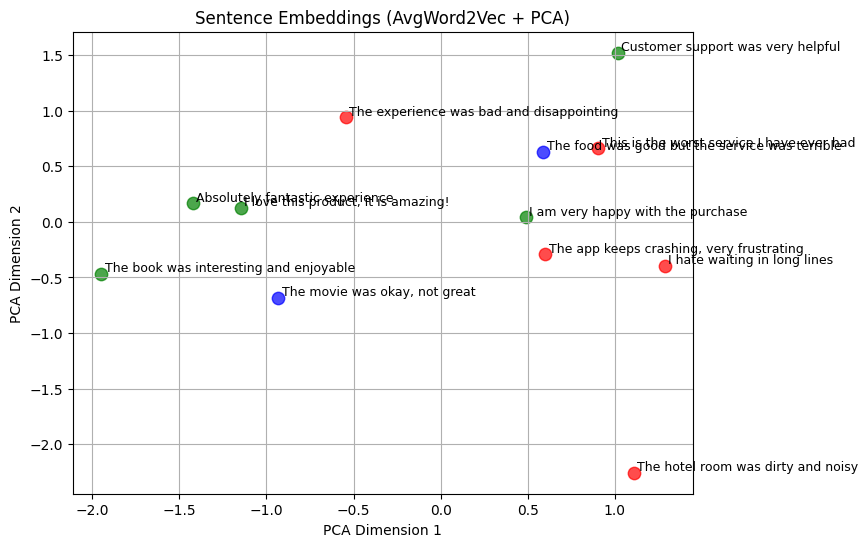

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce 50-d embeddings to 2D
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_vec)

# Map sentiment to colors
colors = {'positive': 'green', 'negative': 'red', 'neutral': 'blue'}

plt.figure(figsize=(8,6))
for i, label in enumerate(y):
    plt.scatter(X_2d[i,0], X_2d[i,1], color=colors[label], s=80, alpha=0.7)
    plt.text(X_2d[i,0]+0.02, X_2d[i,1]+0.02, df['text'][i], fontsize=9)

plt.title("Sentence Embeddings (AvgWord2Vec + PCA)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.grid(True)
plt.show()
